In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np


from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.preprocessing import MinMaxScaler, Imputer
import xgboost as xgb
import operator
import gc
import myutil

In [2]:
class XgbWrapper(object):
    def __init__(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 250)
        
    def init_model(self):
        return  
    def __repr__(self):
        return 'xgb'

    def train(self, x_train, y_train):
        self.dtrain = xgb.DMatrix(x_train, label=y_train)
        self.gbdt = xgb.train(self.param, self.dtrain, self.nrounds)

    def predict(self, x):
        result = self.gbdt.predict(xgb.DMatrix(x))
        return result
    
    def get_coef(self):
        importance = self.gbdt.get_fscore()
        importance_df = pd.DataFrame(
                            sorted(importance.items(), key=operator.itemgetter(1)), 
                            columns=['feature','fscore']
                        )
        return importance_df['fscore']

xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'binary:logistic',
    'max_depth': 4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'nrounds': 200
}

xg = XgbWrapper(seed=0, params=xgb_params)

In [3]:
# Build model inputs
data, test, y = myutil.get_train_test_label()


train datasset shape: (307511, 828)
test datasset shape: (48744, 828)


In [4]:
oof_preds, test_preds, importances, folds = myutil.cross_validation(data, test, y, xg)

Fold  1 AUC : 0.782528
Fold  2 AUC : 0.780082
Fold  3 AUC : 0.781090
Fold  4 AUC : 0.783285
Fold  5 AUC : 0.776712
Full AUC score 0.780723


xgb
Index(['prev_app_NAME_SELLER_INDUSTRY_Construction_count',
       'prev_app_NAME_SELLER_INDUSTRY_Connectivity_count_norm',
       'prev_app_NAME_SELLER_INDUSTRY_Connectivity_count',
       'prev_app_CHANNEL_TYPE_Regional / Local_count_norm',
       'prev_app_CHANNEL_TYPE_Stone_count',
       'prev_app_CHANNEL_TYPE_Stone_count_norm',
       'prev_app_CHANNEL_TYPE_Regional / Local_count',
       'prev_app_CHANNEL_TYPE_Credit and cash offices_count',
       'prev_app_CHANNEL_TYPE_Credit and cash offices_count_norm',
       'prev_app_CHANNEL_TYPE_Country-wide_count_norm',
       'prev_app_NAME_SELLER_INDUSTRY_Clothing_count_norm',
       'prev_app_CHANNEL_TYPE_Country-wide_count',
       'prev_app_NAME_SELLER_INDUSTRY_Clothing_count',
       'prev_app_NAME_SELLER_INDUSTRY_Auto technology_count_norm',
       'prev_app_NAME_SELLER_INDUSTRY_Auto technology_count',
       'prev_app_CHANNEL_TYPE_Contact center_count_norm',
       'prev_app_CHANNEL_TYPE_Contact center_count',
       'prev_ap

/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


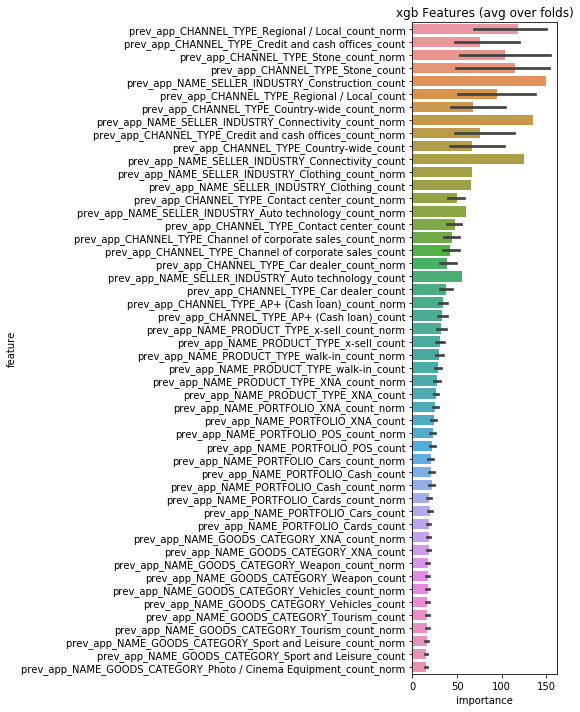

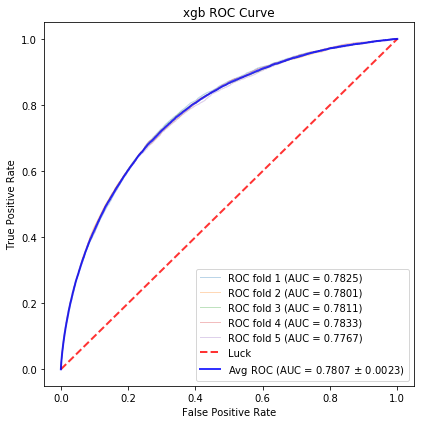

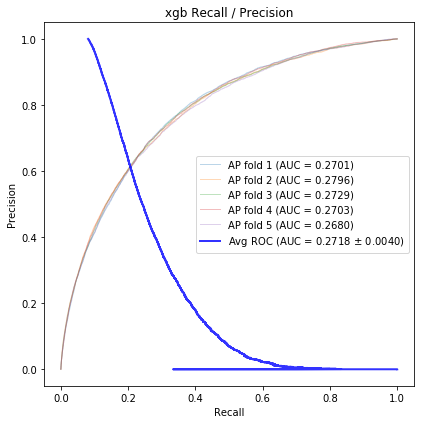

In [6]:
title = 'xgb'
myutil.report(test_preds, folds, importances, data, y, oof_preds, title)

In [4]:
oof_preds, test_preds, importances, folds = myutil.cross_validation_undersample(data, test, y, xg)

total n fold : 11
Fold  1 AUC : 0.501715
Fold  2 AUC : 0.503428
Fold  3 AUC : 0.498820
Fold  4 AUC : 0.503107
Fold  5 AUC : 0.499851
Fold  6 AUC : 0.499492
Fold  7 AUC : 0.502035
Fold  8 AUC : 0.496878
Fold  9 AUC : 0.503883
Fold 10 AUC : 0.504003
Fold 11 AUC : 0.500408
Full AUC score 0.921787


xgb
Index(['prev_app_PRODUCT_COMBINATION_Cash Street: low_count',
       'prev_app_PRODUCT_COMBINATION_Cash Street: high_count_norm',
       'prev_app_PRODUCT_COMBINATION_Cash Street: high_count',
       'prev_app_PRODUCT_COMBINATION_Card Street_count_norm',
       'prev_app_PRODUCT_COMBINATION_Card Street_count',
       'prev_app_NAME_YIELD_GROUP_middle_count_norm',
       'prev_app_NAME_YIELD_GROUP_XNA_count_norm',
       'prev_app_NAME_YIELD_GROUP_high_count',
       'prev_app_NAME_YIELD_GROUP_XNA_count',
       'prev_app_NAME_YIELD_GROUP_low_action_count',
       'prev_app_NAME_YIELD_GROUP_middle_count',
       'prev_app_NAME_YIELD_GROUP_high_count_norm',
       'prev_app_NAME_SELLER_INDUSTRY_MLM partners_count_norm',
       'prev_app_PRODUCT_COMBINATION_Cash_count_norm',
       'prev_app_NAME_SELLER_INDUSTRY_MLM partners_count',
       'prev_app_NAME_SELLER_INDUSTRY_XNA_count_norm',
       'prev_app_PRODUCT_COMBINATION_Cash_count',
       'prev_app_NAME_SELLER_INDUSTRY_XNA_count',

/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


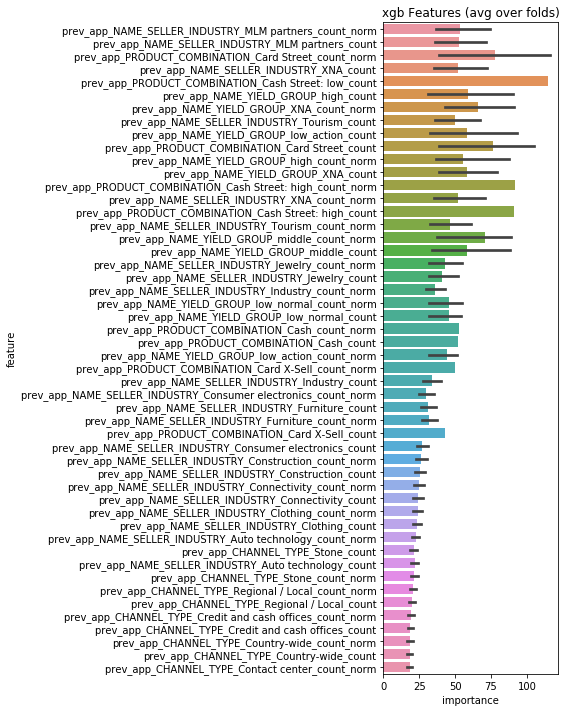

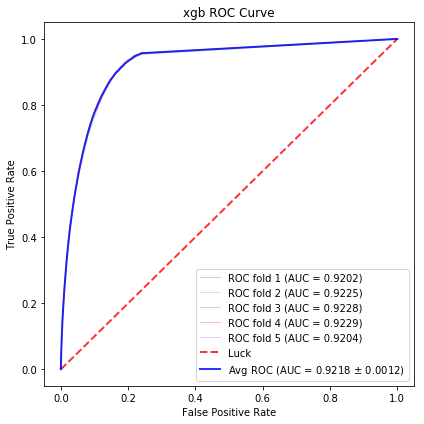

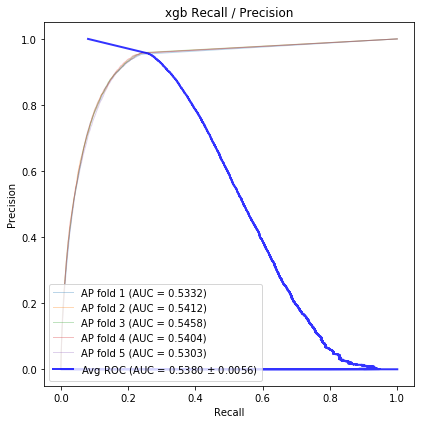

In [5]:
title = 'xgb'
myutil.report(test_preds, folds, importances, data, y, oof_preds, title)